In [1]:
# 그래프 출력 관련 설정
# 아래 코드는 그래프를 그리고 싶을때 그대로 가져다가 한번 실행시켜주면 편합니다.
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_style("darkgrid")

%config InlineBackend.figure_format = 'retina'
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 표시 문제
mpl.rcParams['figure.figsize'] = (15,8)
	
# 한글 폰트 설정
path = 'data/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
# fm._rebuild() => Colab에서는 이 코드도 실행해주세요

In [2]:
# 엑셀 등의 데이터를 편리하게 다룰수 있는 pandas 라이브러리
import pandas as pd
import numpy as np

In [3]:
# pandas의 read_csv 함수를 사용해서 'data_3351_20221005.csv' 파일을 읽어옵니다.
# 'data_3351_20221005.csv'데이터는 한국거래소(KRX)에서 가져온 코스피200 데이터 입니다.
코스피200 = pd.read_csv('data/data_3351_20221005.csv', encoding='cp949')

In [4]:
# 데이터가 어떻게 구성되어있는지 3개만 확인해보겠습니다
코스피200.head(3)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2022/10/05,289.05,0.78,0.27,293.87,294.47,287.44,138907.0,7289051.0,1.528199e+09
1,2022/10/04,288.27,6.91,2.46,286.25,288.96,285.42,120019.0,6053599.0,1.522329e+09
2,2022/09/30,281.36,-1.29,-0.46,281.75,284.35,278.39,143738.0,6233068.0,1.485352e+09


In [5]:
# 결측치(셀에 값이 없음)를 제거합니다.
코스피200 = 코스피200.dropna()

# 데이터를 그대로 뿌리면, 최근일자부터 그래프가 그려져서
# 일자별로 정렬해서 데이터프레임을 다시 저장했습니다.
코스피200 = 코스피200.sort_values('일자')

In [6]:
# 그래프의 x축에 쓸 글자(라벨) 만들기
label_x = 코스피200['일자'].loc[[ i for i in range(0, len(코스피200), 365) ]].to_list()

In [7]:
# 이동평균을 계산해 넣을빈 컬럼 추가해주기, 일부러 결측치(np.nan, 값이 없음을 의미)를 넣어줬습니다.
코스피200['MA5'] = np.nan
코스피200['MA20'] = np.nan
코스피200['MA60'] = np.nan
코스피200['MA120'] = np.nan
코스피200.head(3)

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,MA5,MA20,MA60,MA120
5269,2001/06/11,75.27,-1.92,-2.49,75.95,76.33,75.17,197161.0,1274272.0,187964063.0,NaN,NaN,NaN,NaN
5268,2001/06/12,75.08,-0.19,-0.25,74.89,75.78,74.69,174177.0,1063817.0,187535215.0,NaN,NaN,NaN,NaN
5267,2001/06/13,75.90,0.82,1.09,75.70,75.90,75.08,210674.0,1328703.0,189565444.0,NaN,NaN,NaN,NaN


In [8]:
# rolling(window=5) 의 결과로 5개 행에서 종가를 가져오고
# mean 함수로 평균을 구합니다.
코스피200['MA5'] = 코스피200['종가'].rolling(window=5).mean()

# 위에서 숫자만 바꿔서 나머지 컬럼도 채워줍니다.
코스피200['MA20'] = 코스피200['종가'].rolling(window=20).mean()
코스피200['MA60'] = 코스피200['종가'].rolling(window=60).mean()
코스피200['MA120'] = 코스피200['종가'].rolling(window=120).mean()

# 120일 이동평균까지 잘 채워졌는지 확인하기 위해
# iloc(integer-location) 함수를 사용해서 115번째 행부터 121번째 행까지 뿌려보겠습니다.
코스피200.iloc[115:122]

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,MA5,MA20,MA60,MA120
5154,2001/11/26,84.20,3.65,4.53,81.74,84.20,81.70,517480.0,3547509.0,217939890.0,79.144,73.3125,66.745667,NaN
5153,2001/11/27,83.65,-0.55,-0.65,84.16,85.02,82.53,550560.0,3403404.0,216481405.0,80.546,74.1960,66.976333,NaN
5152,2001/11/28,78.77,-4.88,-5.83,82.57,82.99,78.58,509323.0,2661673.0,203852464.0,80.990,74.8125,67.165500,NaN
5151,2001/11/29,78.07,-0.70,-0.89,77.75,79.85,76.67,465534.0,2646903.0,199899810.0,81.048,75.3540,67.349167,NaN
5150,2001/11/30,80.03,1.96,2.51,80.37,80.78,79.61,624900.0,2957298.0,204825658.0,80.944,75.9510,67.529333,68.961417
5149,2001/12/03,80.83,0.80,1.00,79.96,81.28,78.32,741614.0,2978154.0,209297036.0,80.270,76.5160,67.739167,69.007750
5148,2001/12/04,80.78,-0.05,-0.06,80.56,81.59,79.72,688822.0,3047897.0,209091104.0,79.696,77.0535,67.948333,69.055250


In [9]:
# 주가가 20일 이동평균선을 돌파하는 시점을 찾아냅니다.
# 상승하는 시점에 돌파는 break_up_20 컬럼에
# 하락하는 시점에 돌파는 break_down_20 컬럼에 값을 넣어줍니다.

# 빈 컬럼 생성
코스피200['break_up_20'] = np.nan
코스피200['break_down_20'] = np.nan

# 어제 날짜와 비교를 해야하므로 1번 인덱스부터 반복합니다.
for idx in 코스피200.index[1:]:
    # 상승 돌파 조건입니다
    # 1. 이전일자(idx+1) 종가가 현재일자(idx) 20이동평균 보다 낮고
    # 2. 현재일자(idx) 종가가 현재일자(idx) 20이동평균 보다 클 때
    # 주가가 20이동평균을 돌파했다고 판단할 수 있습니다.
    if 코스피200.loc[idx+1, '종가'] < 코스피200.loc[idx, 'MA20'] and 코스피200.loc[idx, '종가'] > 코스피200.loc[idx, 'MA20']:
        # 해당일자 주가에 마커(삼각형)을 표시할 것이기 때문에, 주가나 20이동평균값을 저장합니다
        코스피200.loc[idx, 'break_up_20'] = 코스피200.loc[idx, 'MA20']

    # 하락 돌파 조건입니다
    # 상승돌파와 반대로 생각하면 됩니다.
    if 코스피200.loc[idx+1, '종가'] > 코스피200.loc[idx, 'MA20'] and 코스피200.loc[idx, '종가'] < 코스피200.loc[idx, 'MA20']:
        코스피200.loc[idx, 'break_down_20'] = 코스피200.loc[idx, 'MA20']
    
    # Quiz: 왜 이전일자 인덱스가 idx+1 일까요?
    # 회장에게 갠톡으로 정답 제출하실수 있고, 정답은 커피 사드립니다.

코스피200

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,MA5,MA20,MA60,MA120,break_up_20,break_down_20
5269,2001/06/11,75.27,-1.92,-2.49,75.95,76.33,75.17,197161.0,1274272.0,1.879641e+08,NaN,NaN,NaN,NaN,NaN,NaN
5268,2001/06/12,75.08,-0.19,-0.25,74.89,75.78,74.69,174177.0,1063817.0,1.875352e+08,NaN,NaN,NaN,NaN,NaN,NaN
5267,2001/06/13,75.90,0.82,1.09,75.70,75.90,75.08,210674.0,1328703.0,1.895654e+08,NaN,NaN,NaN,NaN,NaN,NaN
5266,2001/06/14,75.69,-0.21,-0.28,75.71,77.09,75.36,220885.0,1546156.0,1.891108e+08,NaN,NaN,NaN,NaN,NaN,NaN
5265,2001/06/15,76.35,0.66,0.87,75.16,76.35,74.43,197625.0,1499999.0,1.924685e+08,75.658,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022/09/28,283.19,-7.01,-2.42,287.66,289.75,280.80,160839.0,6903850.0,1.495226e+09,292.510,307.2510,315.009000,328.374167,NaN,NaN
3,2022/09/29,282.65,-0.54,-0.19,286.60,287.81,282.56,128427.0,5584454.0,1.496674e+09,288.710,305.4090,314.653000,327.721167,NaN,NaN
2,2022/09/30,281.36,-1.29,-0.46,281.75,284.35,278.39,143738.0,6233068.0,1.485352e+09,285.434,303.3290,314.191833,327.101417,NaN,NaN
1,2022/10/04,288.27,6.91,2.46,286.25,288.96,285.42,120019.0,6053599.0,1.522329e+09,285.134,301.9915,313.958333,326.536917,NaN,NaN


In [10]:
# 일자를 기준으로 컬럼의 lineplot을 그려주는 함수 만들기
def show_graph(column_name, str_date):
    sub_data = 코스피200[코스피200['일자'] >= str_date]

    sns.lineplot(x=sub_data['일자'], y=sub_data['MA5'], linewidth=1)
    sns.lineplot(x=sub_data['일자'], y=sub_data['MA20'], linewidth=5)
    sns.lineplot(x=sub_data['일자'], y=sub_data['MA60'], linewidth=1)
    sns.lineplot(x=sub_data['일자'], y=sub_data['MA120'], linewidth=1)
    
    ax = sns.lineplot(x=sub_data['일자'], y=sub_data[column_name], linewidth=5)

    # 마커를 표시합니다.
    # 인터넷에 matplotlib marker color, matplotlib marker character 로 검색해서 종류를 변경해보세요
    # ^는 삼각형(위), v는 삼각형(아래),r은 red, b는 blue를 의미합니다.
    # 색상, 모양, 크기(markersize)는 변경할 수 있습니다.
    ax.plot(sub_data['일자'], sub_data['break_up_20'], "r^", markersize=10)
    ax.plot(sub_data['일자'], sub_data['break_down_20'], "bv", markersize=10)

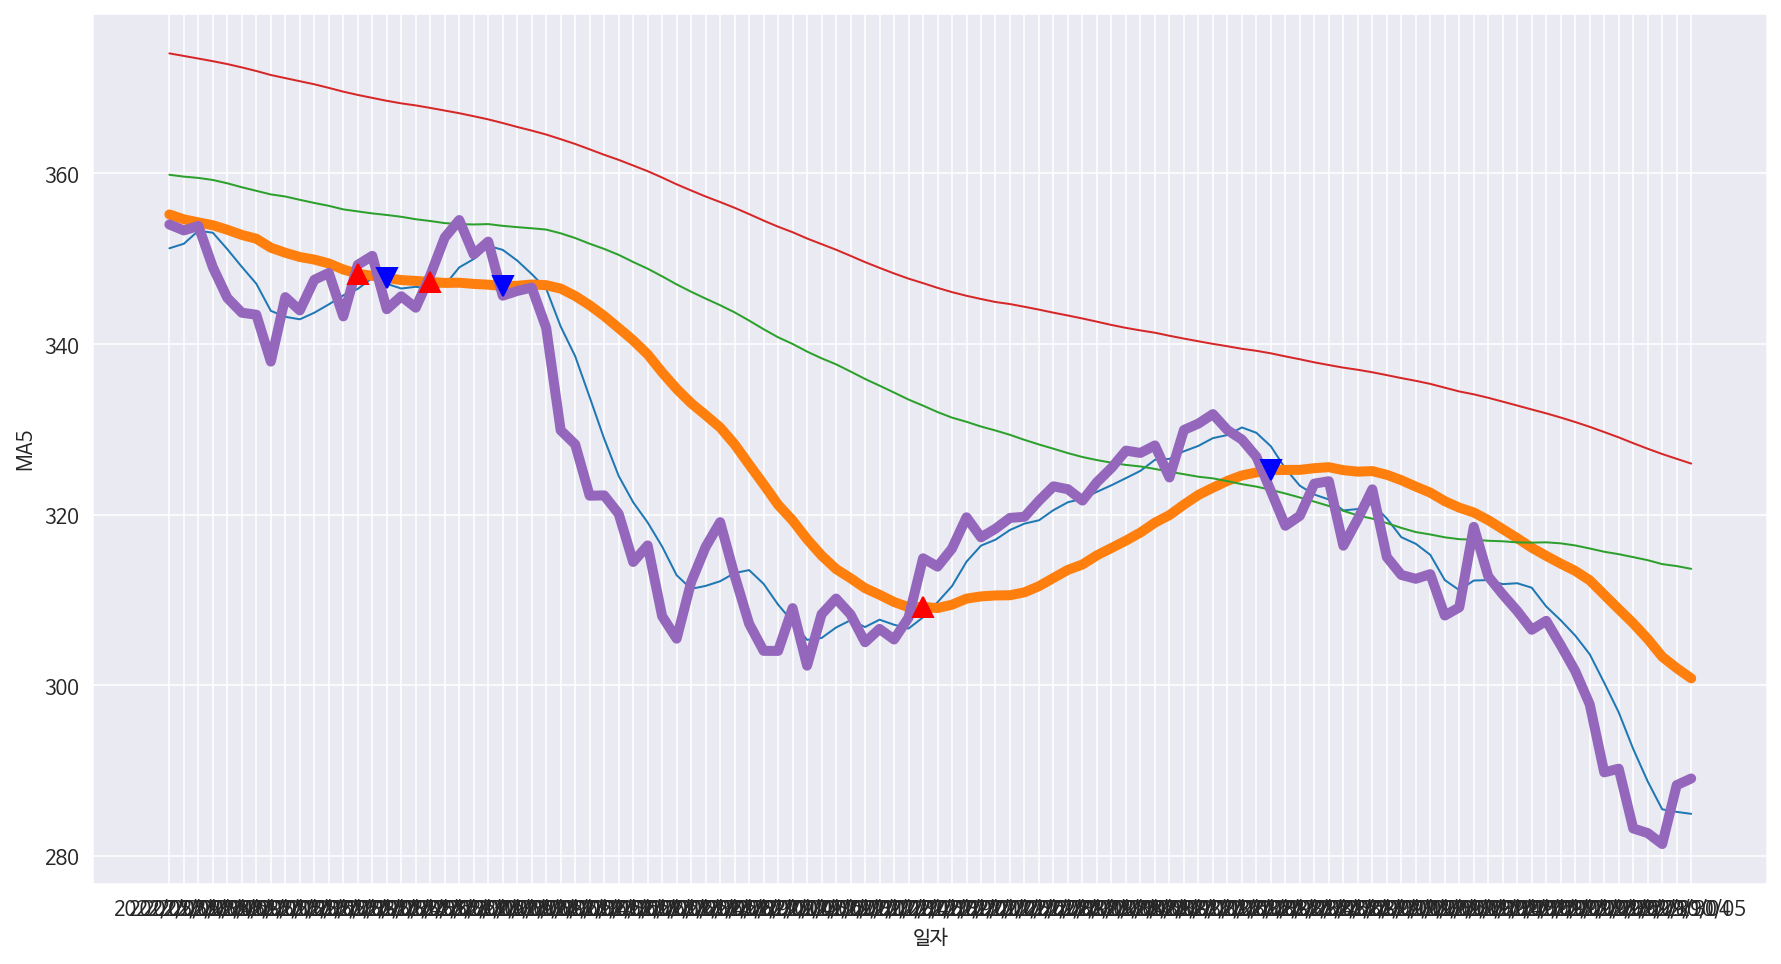

In [11]:
show_graph('종가', '2022/05/01')

In [12]:
# 이번엔 캔틀차트에 마커을 넣어보겠습니다.
import mpl_finance

def show_candle(str_date):
    sub_data = 코스피200[코스피200['일자'] >= str_date]

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    mpl_finance.candlestick2_ohlc(ax, sub_data['시가'], sub_data['고가'], sub_data['저가'], sub_data['종가'], width=0.5, colorup='r', colordown='b')
    
    ax.plot(sub_data['일자'], sub_data['MA5'], label='MA5', linewidth=1)
    ax.plot(sub_data['일자'], sub_data['MA20'], label='MA20', linewidth=1)
    ax.plot(sub_data['일자'], sub_data['MA60'], label='MA60', linewidth=1)
    ax.plot(sub_data['일자'], sub_data['MA120'], label='MA120', linewidth=1)
    
    # 마커를 표시합니다.
    ax.plot(sub_data['일자'], sub_data['break_up_20'], "m^", markersize=10)
    ax.plot(sub_data['일자'], sub_data['break_down_20'], "yv", markersize=10)

c:\Users\User\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


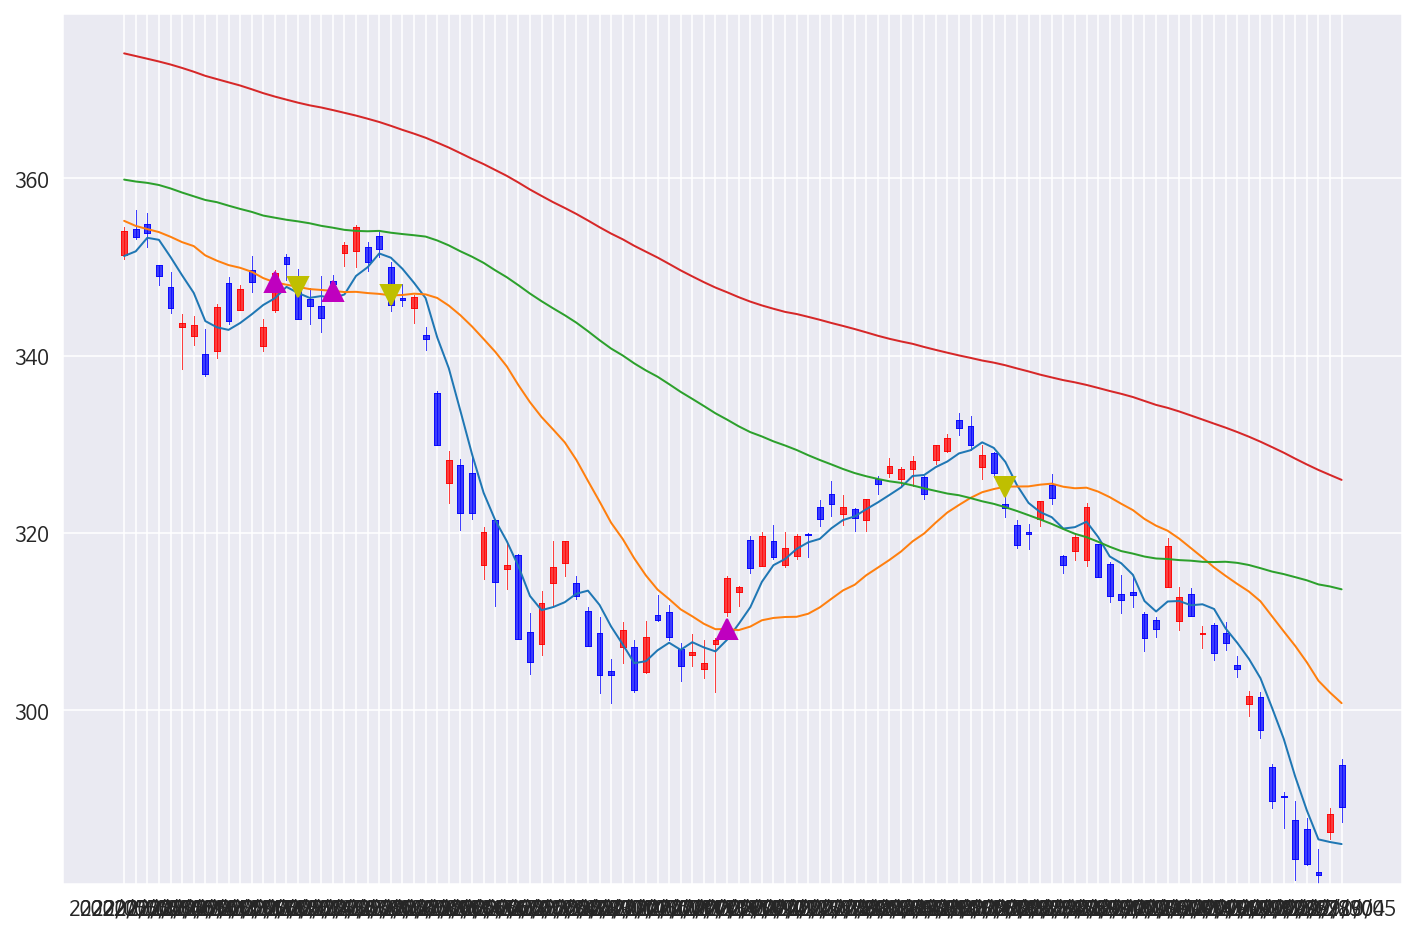

In [13]:
show_candle('2022/05/01')